In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [7]:
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data.drop('id',axis=1,inplace=True)

In [9]:
imputer=KNNImputer()
data['bmi']=imputer.fit_transform(data[['bmi']])

In [10]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

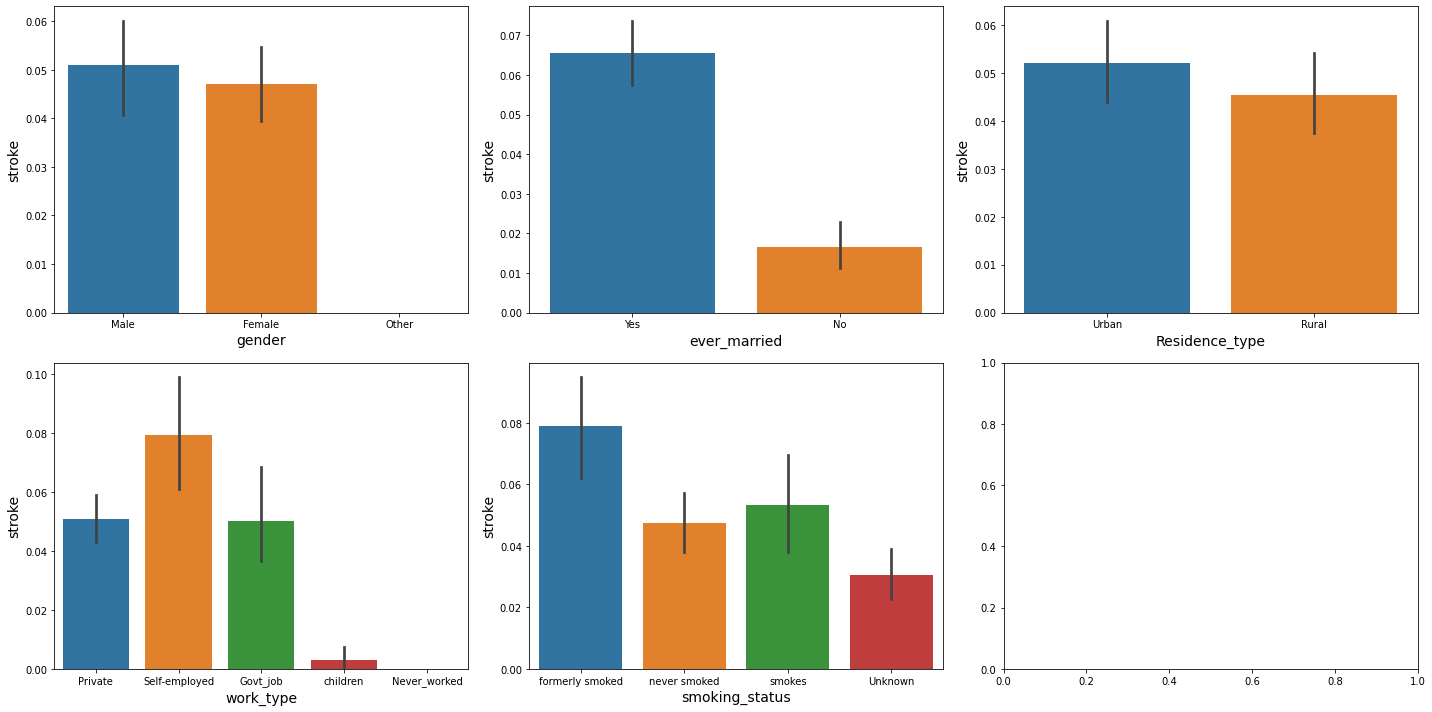

In [11]:
#Relation between categorical columns and target column
catgorical_features=['gender',"ever_married","Residence_type",'work_type','smoking_status']

fig,axes=plt.subplots(2,3,figsize=(20,10))
axes=[ax for axes_row in axes for ax in axes_row]
target='stroke'

for i,c in enumerate(catgorical_features):
  sn.barplot(data[c],data[target],ax=axes[i])
  axes[i].set_ylabel('stroke',fontsize=14)
  axes[i].set_xlabel(c,fontsize=14)

plt.tight_layout()
plt.show()

In [12]:
enc=LabelEncoder()

In [13]:
gender=enc.fit_transform(data['gender'])
ever_married=enc.fit_transform(data['ever_married'])
residence_type=enc.fit_transform(data['Residence_type'])

In [14]:
data['ever_married']=ever_married

data['gender']=gender
data['Residence_type']=residence_type

In [15]:
def onehot_encode(df,column):
  df=df.copy()
  dummies=pd.get_dummies(df[column],prefix=column)

  df=pd.concat([df,dummies],axis=1)
  df=df.drop(column,axis=1)
  return df

In [16]:
for column in ['work_type','smoking_status']:
     data=onehot_encode(data,column=column)

In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


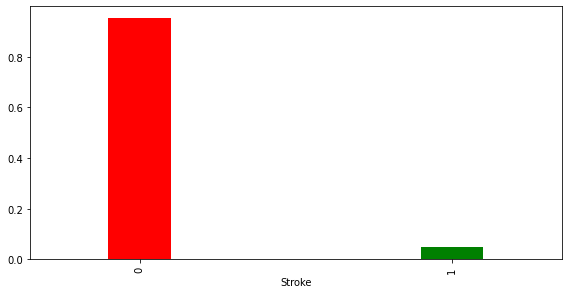

In [18]:
fig,axes=plt.subplots(figsize=(8,4))
data['stroke'].value_counts(normalize=True).plot.bar(width=0.2,color=('red','green'))
plt.tight_layout()
plt.xlabel("Stroke")
plt.show()

In [19]:
    Y = data['stroke']
    X = data.drop('stroke', axis=1)

    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=1)

In [20]:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [21]:
X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4152,1.179848,0.525978,-0.327504,-0.239632,0.722864,-1.016775,-0.708689,-0.119923,-0.382179,-0.068333,-1.148952,2.281083,-0.399645,-0.664047,-0.459239,-0.760111,2.347244
4051,1.179848,0.525978,-0.327504,-0.239632,0.722864,0.983502,2.769942,-0.862341,2.616572,-0.068333,-1.148952,-0.438388,-0.399645,-0.664047,-0.459239,1.315597,-0.426032
5076,-0.847567,-0.402645,-0.327504,-0.239632,0.722864,-1.016775,1.516505,-0.771167,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,1.315597,-0.426032
874,1.179848,1.631482,-0.327504,-0.239632,0.722864,-1.016775,-1.074698,-0.289247,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,1.315597,-0.426032
3534,-0.847567,0.791299,-0.327504,-0.239632,0.722864,0.983502,0.055339,-1.279137,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,1.315597,-0.426032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.179848,0.127997,-0.327504,-0.239632,0.722864,0.983502,0.708548,0.049400,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,1.315597,-0.426032
2763,-0.847567,0.083777,-0.327504,-0.239632,0.722864,-1.016775,-0.925910,0.401072,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,1.505917,-0.459239,-0.760111,-0.426032
905,-0.847567,-0.535305,-0.327504,-0.239632,0.722864,-1.016775,-0.649306,0.869968,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,1.315597,-0.426032
3980,-0.847567,0.083777,-0.327504,-0.239632,0.722864,-1.016775,2.481859,3.396794,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,-0.760111,2.347244


In [22]:
Y_train

4152    0
4051    0
5076    0
874     0
3534    0
       ..
2895    0
2763    0
905     0
3980    0
235     1
Name: stroke, Length: 4088, dtype: int64

In [23]:
X_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4673,-0.847567,-0.048884,-0.327504,-0.239632,0.722864,-1.016775,0.161300,1.078366,2.616572,-0.068333,-1.148952,-0.438388,-0.399645,-0.664047,2.177515,-0.760111,-0.426032
3232,-0.847567,1.543042,-0.327504,-0.239632,0.722864,0.983502,-0.604493,0.153599,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,2.177515,-0.760111,-0.426032
3694,1.179848,-0.667966,-0.327504,-0.239632,-1.383386,0.983502,-0.715311,-0.458570,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,-0.760111,2.347244
1070,-0.847567,1.675702,-0.327504,-0.239632,0.722864,-1.016775,3.105266,-1.018640,-0.382179,-0.068333,-1.148952,2.281083,-0.399645,-0.664047,-0.459239,1.315597,-0.426032
4163,-0.847567,0.393318,-0.327504,-0.239632,0.722864,-1.016775,-0.190360,-0.119923,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,1.505917,-0.459239,-0.760111,-0.426032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,1.179848,-1.884904,-0.327504,-0.239632,-1.383386,0.983502,-0.720830,-0.003580,-0.382179,-0.068333,-1.148952,-0.438388,2.502219,1.505917,-0.459239,-0.760111,-0.426032
4555,-0.847567,-0.933287,-0.327504,-0.239632,-1.383386,-1.016775,-0.081087,1.495162,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-0.664047,-0.459239,-0.760111,2.347244
1056,1.179848,-1.508149,-0.327504,-0.239632,-1.383386,0.983502,-0.172920,-0.732092,-0.382179,-0.068333,-1.148952,-0.438388,2.502219,1.505917,-0.459239,-0.760111,-0.426032
854,-0.847567,0.127997,-0.327504,-0.239632,0.722864,0.983502,-0.243782,-0.523694,-0.382179,-0.068333,-1.148952,2.281083,-0.399645,-0.664047,-0.459239,1.315597,-0.426032


In [24]:
Y_test

4673    0
3232    0
3694    0
1070    0
4163    0
       ..
2030    0
4555    0
1056    0
854     0
4288    0
Name: stroke, Length: 1022, dtype: int64

#Training

#Decision Tree

In [25]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
ac_dt=accuracy_score(Y_test,Y_pred)*100
f1_dt=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_dt, f1_dt)
    )

 Accuracy: 90.80%
 F1-Score: 0.175


#Regression

In [26]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
ac_lr=accuracy_score(Y_test,Y_pred)*100
f1_lr=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_lr, f1_lr)
    )


 Accuracy: 94.03%
 F1-Score: 0.000


#KNN

In [27]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
ac_knn=accuracy_score(Y_test,Y_pred)*100
f1_knn=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_knn, f1_knn)
    )

 Accuracy: 94.03%
 F1-Score: 0.062


#Random Forest

In [28]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
ac_rf=accuracy_score(Y_test,Y_pred)*100
f1_rf=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_rf, f1_rf)
    )

 Accuracy: 93.84%
 F1-Score: 0.000


#SVM

In [29]:
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
ac_svc=accuracy_score(Y_test,Y_pred)*100
f1_svc=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_svc, f1_svc)
    )

 Accuracy: 94.13%
 F1-Score: 0.000


In [30]:
Linsvc=SVC()
Linsvc.fit(X_train,Y_train)
Y_pred=Linsvc.predict(X_test)
ac_Linsvc=accuracy_score(Y_test,Y_pred)*100
f1_Linsvc=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_Linsvc, f1_Linsvc)
    )

 Accuracy: 94.13%
 F1-Score: 0.000


In [31]:
mlp=MLPClassifier()
mlp.fit(X_train,Y_train)
Y_pred=mlp.predict(X_test)
ac_mlp=accuracy_score(Y_test,Y_pred)*100
f1_mlp=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_mlp, f1_mlp)
    )

 Accuracy: 93.74%
 F1-Score: 0.059


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Text(0.5, 0, 'Accuracy before Oversampling ')

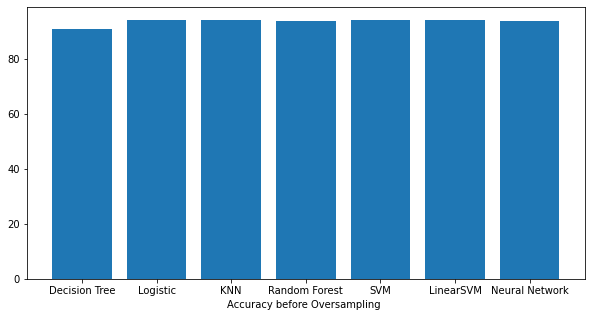

In [32]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM',"LinearSVM","Neural Network"],[ac_dt,ac_lr,ac_knn,ac_rf,ac_svc,ac_Linsvc,ac_mlp])
plt.xlabel("Accuracy before Oversampling ")


Text(0.5, 0, 'F1-Score before Oversampling ')

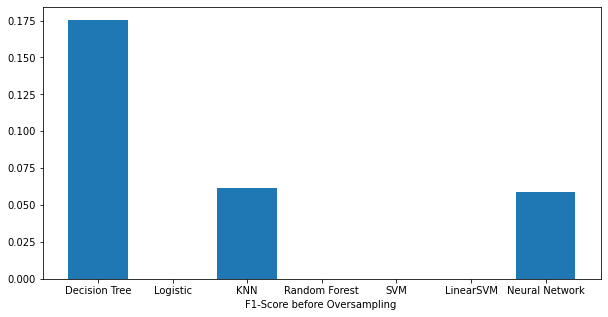

In [33]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM',"LinearSVM","Neural Network"],[f1_dt,f1_lr,f1_knn,f1_rf,f1_svc,f1_Linsvc,f1_mlp])
plt.xlabel("F1-Score before Oversampling ")

#Handle Imbalance Class with Oversampling

In [34]:
oversampled_data = pd.concat([X_train, Y_train], axis=1).copy()

num_samples = Y_train.value_counts()[0] - Y_train.value_counts()[1]
new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=1)

oversampled_data = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

Y_train_oversampled = oversampled_data['stroke']
X_train_oversampled = oversampled_data.drop('stroke', axis=1)

In [35]:
Y_train_oversampled.value_counts()


1    3899
0    3899
Name: stroke, dtype: int64

#Decision Tree

In [36]:
dt_oversample=DecisionTreeClassifier()
dt_oversample.fit(X_train_oversampled,Y_train_oversampled)
Y_pred=dt_oversample.predict(X_test)
ac_dt_oversample=accuracy_score(Y_test,Y_pred)*100
f1_dt_oversample=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_dt_oversample, f1_dt_oversample)
    )

 Accuracy: 90.90%
 F1-Score: 0.162


#Regression

In [37]:
lr_oversample=LogisticRegression()
lr_oversample.fit(X_train_oversampled,Y_train_oversampled)
Y_pred=lr_oversample.predict(X_test)
ac_lr_oversample=accuracy_score(Y_test,Y_pred)*100
f1_lr_oversample=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_lr_oversample, f1_lr_oversample)
    )

 Accuracy: 74.07%
 F1-Score: 0.286


#KNN

In [38]:
knn_oversample=KNeighborsClassifier()
knn_oversample.fit(X_train_oversampled,Y_train_oversampled)
Y_pred=knn_oversample.predict(X_test)
ac_knn_oversample=accuracy_score(Y_test,Y_pred)*100
f1_knn_oversample=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_knn_oversample, f1_knn_oversample)
    )

 Accuracy: 85.13%
 F1-Score: 0.116


#Random Forest

In [39]:
rf_oversample=RandomForestClassifier()
rf_oversample.fit(X_train_oversampled,Y_train_oversampled)
Y_pred=rf_oversample.predict(X_test)
ac_rf_oversample=accuracy_score(Y_test,Y_pred)*100
f1_rf_oversample=f1_score(Y_test, Y_pred)
prec_rf_oversample=precision_score(Y_test, Y_pred)
recall_rf_oversample=recall_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_rf_oversample, f1_rf_oversample,prec_rf_oversample,recall_rf_oversample)
    )

 Accuracy: 93.05%
 F1-Score: 0.027


#SVM

In [40]:
svc_oversample=SVC()
svc_oversample.fit(X_train_oversampled,Y_train_oversampled)
Y_pred=svc_oversample.predict(X_test)
ac_svc_oversample=accuracy_score(Y_test,Y_pred)*100
f1_svc_oversample=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_svc_oversample, f1_svc_oversample)
    )

 Accuracy: 77.01%
 F1-Score: 0.235


#LinearSVC

In [41]:
Linsvc_oversample=LinearSVC()
Linsvc_oversample.fit(X_train_oversampled,Y_train_oversampled)
Y_pred=Linsvc_oversample.predict(X_test)
ac_Linsvc_oversample=accuracy_score(Y_test,Y_pred)*100
f1_Linsvc_oversample=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_Linsvc_oversample, f1_Linsvc_oversample)
    )

 Accuracy: 73.58%
 F1-Score: 0.278


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [42]:
mlp_oversample=MLPClassifier()
mlp_oversample.fit(X_train_oversampled,Y_train_oversampled)
Y_pred=mlp_oversample.predict(X_test)
ac_mlp_oversample=accuracy_score(Y_test,Y_pred)*100
f1_mlp_oversample=f1_score(Y_test, Y_pred)
print(
       " Accuracy: {:.2f}%\n F1-Score: {:.3f}"\
        .format(ac_mlp_oversample, f1_mlp_oversample)
    )

 Accuracy: 83.37%
 F1-Score: 0.183


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Text(0.5, 0, 'Accuracy after Oversampling')

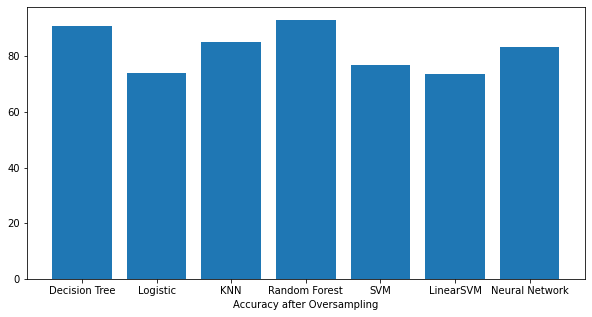

In [43]:

plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM',"LinearSVM","Neural Network"],[ac_dt_oversample,ac_lr_oversample,ac_knn_oversample,ac_rf_oversample,ac_svc_oversample,ac_Linsvc_oversample,ac_mlp_oversample])
plt.xlabel("Accuracy after Oversampling")

Text(0.5, 0, 'F1-Score after Oversampling')

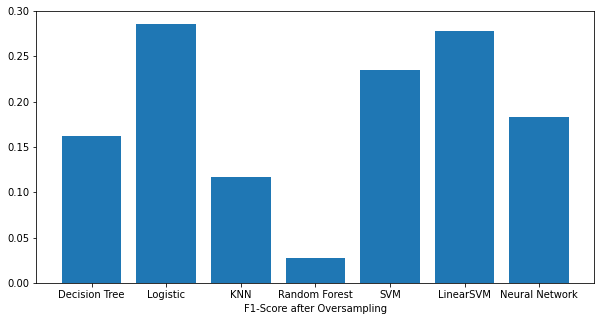

In [44]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM',"LinearSVM","Neural Network"],[f1_dt_oversample,f1_lr_oversample,f1_knn_oversample,f1_rf_oversample,f1_svc_oversample,f1_Linsvc_oversample,f1_mlp_oversample])
plt.xlabel("F1-Score after Oversampling")